<a href="https://colab.research.google.com/github/MajumdarAritra/Insurance_price_predictor/blob/main/insurance_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,NaN,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1336 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1336 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1336.000000,1336.000000,1336.000000,1338.000000
mean,39.219311,30.669338,1.092814,13270.422265
std,14.056887,6.090166,1.205012,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.308750,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.681250,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
pd.isnull(df).sum()

age         2
sex         0
bmi         2
children    2
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
corr_matrix = df.corr()
corr_matrix['charges'].sort_values(ascending=False)

<ipython-input-90-9db89f82a945>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


charges     1.000000
age         0.300226
bmi         0.197394
children    0.069291
Name: charges, dtype: float64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

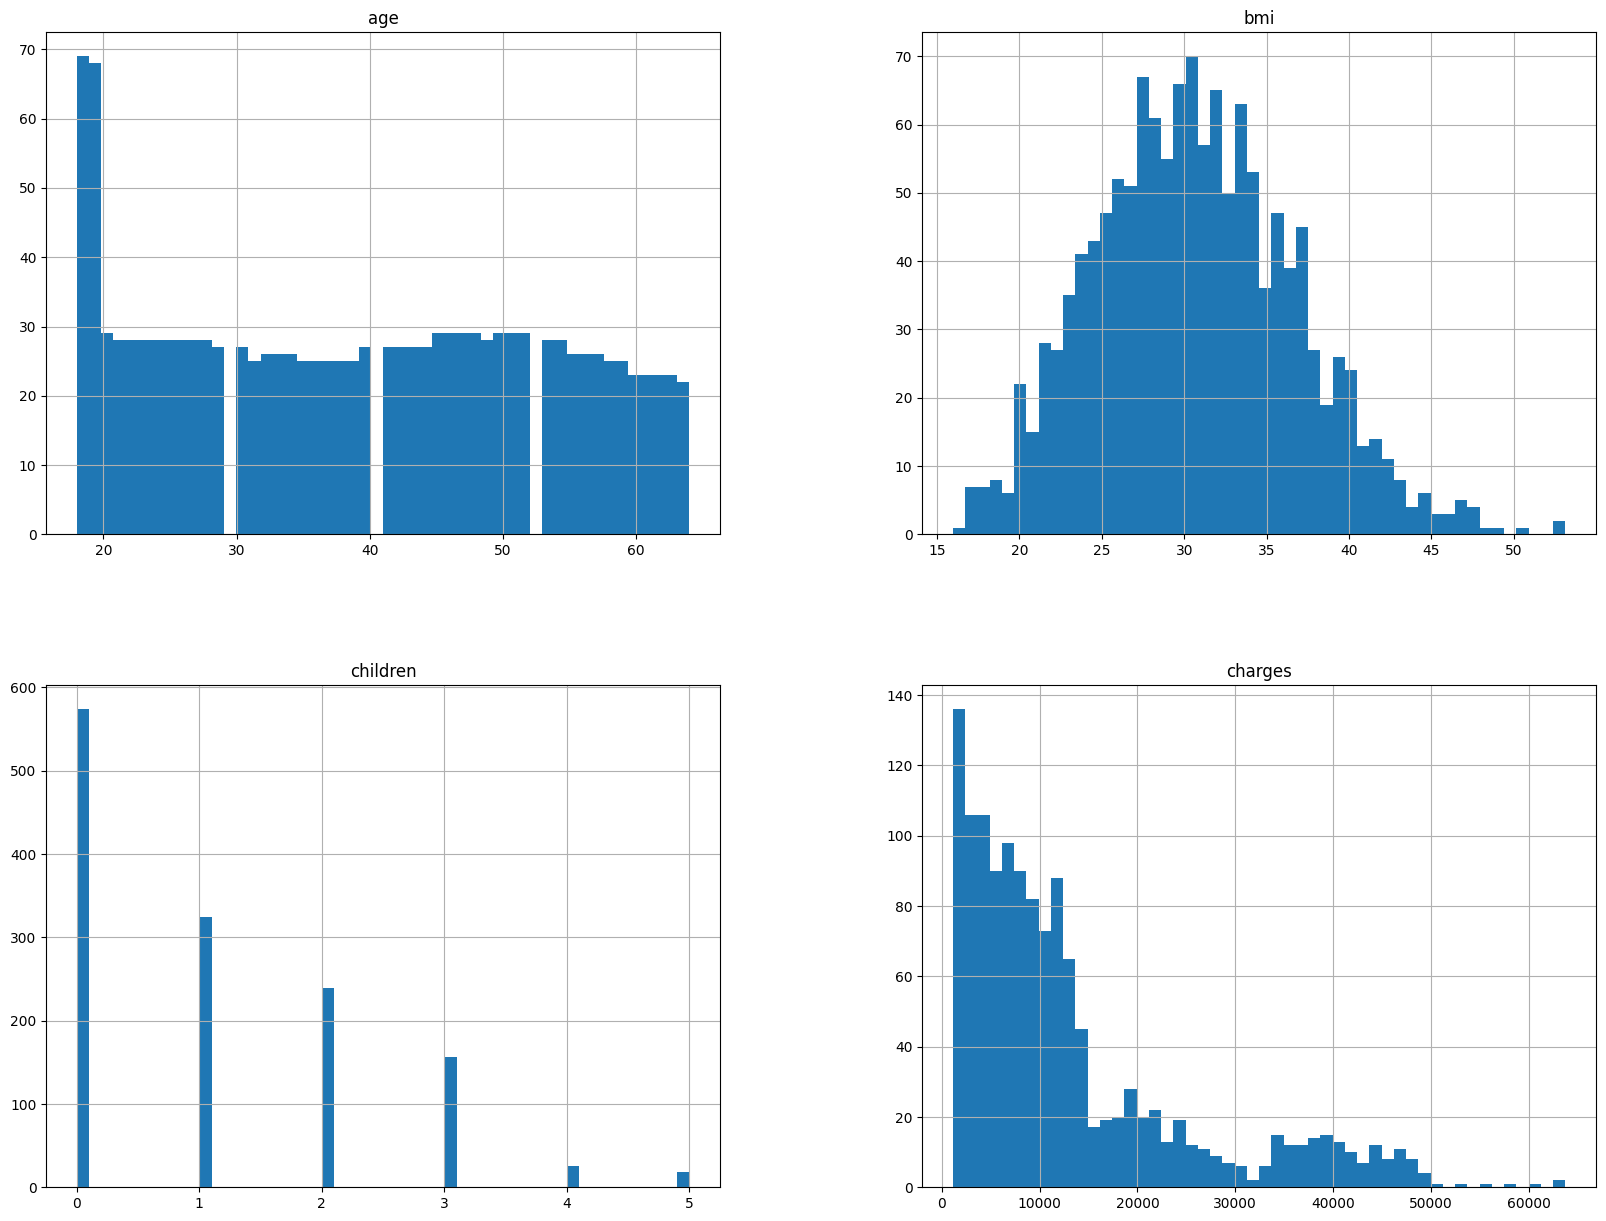

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
df.hist(bins=50,figsize=(20,15))

In [ ]:
from sklearn.preprocessing import LabelEncoder



columns_to_encode = df[['sex', 'region', 'smoker']]
le = LabelEncoder()

for column in columns_to_encode:
    df[column + '_n'] = le.fit_transform(df[column])

df= df.drop(columns_to_encode, axis='columns')


In [ ]:
df.head()

,age,bmi,children,charges,sex_n,region_n,smoker_n
0,19.0,27.900,0.0,16884.92400,0,3,1
1,18.0,33.770,1.0,1725.55230,1,2,0
2,28.0,33.000,NaN,4449.46200,1,2,0
3,33.0,22.705,0.0,21984.47061,1,1,0
4,32.0,28.880,0.0,3866.85520,1,1,0


In [ ]:
df['sex_n'].value_counts()

1    676
0    662
Name: sex_n, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['sex_n']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]



In [ ]:
df = strat_train_set.copy()

array([[<Axes: xlabel='charges', ylabel='charges'>,
        <Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>],
       [<Axes: xlabel='charges', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>],
       [<Axes: xlabel='charges', ylabel='bmi'>,
        <Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>],
       [<Axes: xlabel='charges', ylabel='children'>,
        <Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>]], dtype=object)

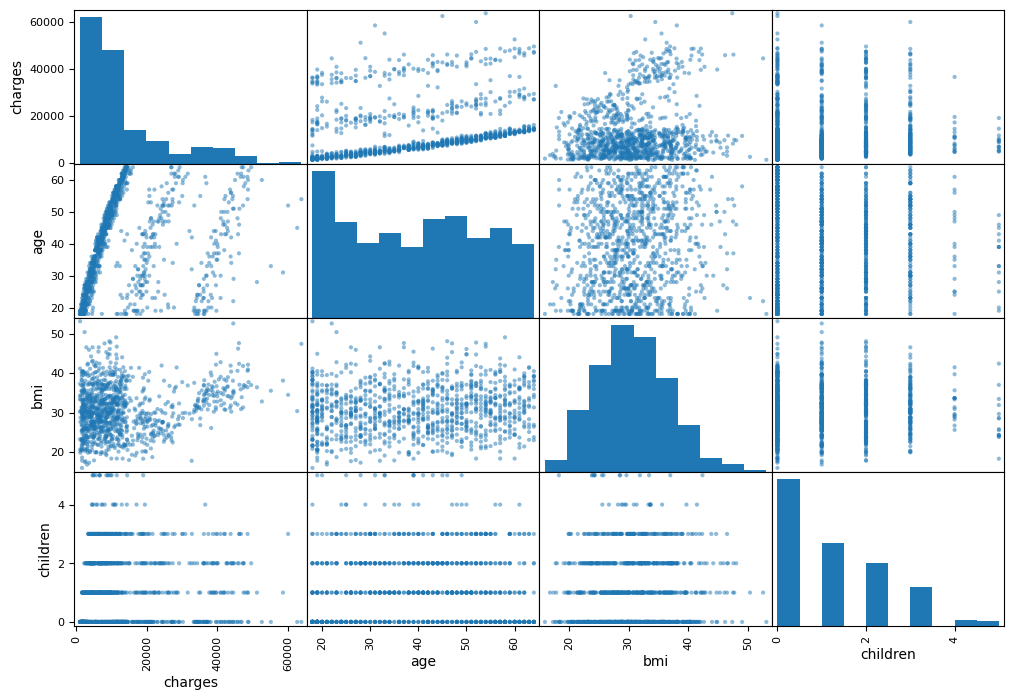

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["charges","age","bmi","children"]
scatter_matrix(df[attributes],figsize = (12,8))

<Axes: xlabel='age', ylabel='charges'>

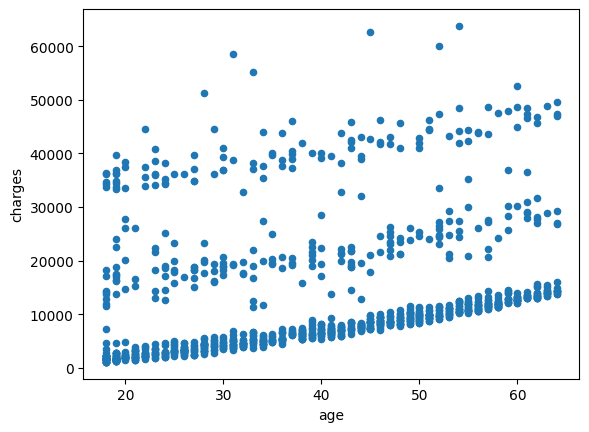

In [ ]:
df.plot(kind="scatter",x="age",y ="charges" )

In [ ]:
df = strat_train_set.drop("charges",axis=1)
df_label= strat_train_set["charges"].copy()
df.head()

,age,bmi,children,sex_n,region_n,smoker_n
242,55.0,26.80,1.0,0,3,0
1157,23.0,23.18,2.0,0,1,0
944,62.0,39.93,0.0,1,2,0
864,51.0,25.40,0.0,1,3,0
342,60.0,27.55,0.0,0,0,0


In [ ]:
mode = df['children'].mode()
df['children'].fillna(mode, inplace=True)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
    ('scaler', MinMaxScaler())
])



In [ ]:
df = pd.DataFrame(df)

df_num_tr = my_pipeline.fit_transform(df)
df_num_tr


array([[ 1.12787515, -0.65579243, -0.07037653, -1.01127855,  1.34777285,
        -0.49853929],
       [-1.17619055, -1.24805507,  0.76632223, -1.01127855, -0.45600069,
        -0.49853929],
       [ 1.63188952,  1.49238673, -0.90707529,  0.98884723,  0.44588608,
        -0.49853929],
       ...,
       [ 0.19184846, -0.40874364,  1.60302099,  0.98884723, -0.45600069,
         2.00585996],
       [ 0.62386078, -0.57971449, -0.07037653, -1.01127855, -1.35788746,
        -0.49853929],
       [ 0.19184846, -1.01491301,  0.76632223,  0.98884723, -1.35788746,
         2.00585996]])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_num_tr,df_label)

LinearRegression()

In [ ]:
x_test = strat_test_set.drop('charges',axis=1)
y_test = strat_test_set['charges'].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)

In [ ]:
from sklearn import metrics
r2_test = metrics.r2_score(y_test, final_predictions)
print('R squared vale : ', r2_test)

R squared vale :  0.7610920625309378
